In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Step 1: Unzip the folder

In [3]:
import zipfile
import os

# Path to the zip file
#zip_file_path = '/content/ORIGINAL_B_ONLY-20240617T202056Z-001.zip'  # Replace with the actual path to your zip file
zip_file_path = '/content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/BCancerPredict.zip'

# Path where you want to extract the files
#extract_path = 'mammograms'
extract_path = 'm_images'

# Create the directory if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files have been extracted to {extract_path}")


Files have been extracted to m_images


## Step 3: Resize Images and Create Train/Test Sets
We'll perform the following tasks:

Resize images to 224x224 pixels.


Split the data into training and testing sets.

Step 2: Group the images and display counts

In [7]:
# @title
import os
from collections import defaultdict

# Path to the extracted mammograms folder
data_dir = '/content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY'

# Define the groups
groups = {
    'Normal': ['BIRAD_0', 'BIRAD_1'],
    'Benign': ['BIRAD_2', 'BIRAD_3'],
    'Malignant': ['BIRAD_4', 'BIRAD_4A', 'BIRAD_4B', 'BIRAD_4C', 'BIRAD_5']
}

# Initialize a dictionary to hold the counts
class_counts = defaultdict(int)

# Check if the data directory exists
if not os.path.exists(data_dir):
    print(f"Data directory {data_dir} does not exist.")
else:
    # Count the number of samples in each group
    for group, categories in groups.items():
        for category in categories:
            category_path = os.path.join(data_dir, category)
            if os.path.exists(category_path):
                print(f"Processing category: {category_path}")
                num_samples = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
                print(f"Number of samples in {category}: {num_samples}")
                class_counts[group] += num_samples
            else:
                print(f"Category path {category_path} does not exist.")

# Display the number of samples in each class and the total number of samples
total_samples = sum(class_counts.values())
print(f"Number of samples in each class: {dict(class_counts)}")
print(f"Total number of samples: {total_samples}")


Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_0
Number of samples in BIRAD_0: 28
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_1
Number of samples in BIRAD_1: 160
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_2
Number of samples in BIRAD_2: 94
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_3
Number of samples in BIRAD_3: 48
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_4
Number of samples in BIRAD_4: 35
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_4A
Number of samples in BIRAD_4A: 18
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_4B
Number of samples in BIRAD_4B: 8
Processing category: /content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY/BIRAD_4C
Number of sa

In [10]:
import os
from collections import defaultdict

# Path to the extracted mammograms folder
data_dir = '/content/m_images/BCancerPredict'

# Define the groups
groups = {
    'Normal': ['NORMAL'],
    'Benign': ['BENIGN'],
    'Malignant': ['MALIGNANT']
}

# Initialize a dictionary to hold the counts
class_counts = defaultdict(int)

# Check if the data directory exists
if not os.path.exists(data_dir):
    print(f"Data directory {data_dir} does not exist.")
else:
    # Count the number of samples in each group
    for group, categories in groups.items():
        for category in categories:
            category_path = os.path.join(data_dir, category)
            if os.path.exists(category_path):
                print(f"Processing category: {category_path}")
                num_samples = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
                print(f"Number of samples in {category}: {num_samples}")
                class_counts[group] += num_samples
            else:
                print(f"Category path {category_path} does not exist.")

# Display the number of samples in each class and the total number of samples
total_samples = sum(class_counts.values())
print(f"Number of samples in each class: {dict(class_counts)}")
print(f"Total number of samples: {total_samples}")


Processing category: /content/m_images/BCancerPredict/NORMAL
Number of samples in NORMAL: 208
Processing category: /content/m_images/BCancerPredict/BENIGN
Number of samples in BENIGN: 179
Processing category: /content/m_images/BCancerPredict/MALIGNANT
Number of samples in MALIGNANT: 90
Number of samples in each class: {'Normal': 208, 'Benign': 179, 'Malignant': 90}
Total number of samples: 477


In [12]:
# @title
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load and resize images
def load_and_resize_data(data_dir, img_size):
    categories = os.listdir(data_dir)
    data = []
    labels = []

    for category in categories:
        category_path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(category_path):
            try:
                img_array = cv2.imread(os.path.join(category_path, img))
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                pass

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Path to the extracted mammograms folder
data_dir = '/content/drive/MyDrive/CANCER RESEARCH/SylviaPhD/ORIGINAL_B_ONLY'
#data_dir = '/content/m_images/BCancerPredict'

# Define the image size
IMG_SIZE = 224

# Load and resize the data
data, labels = load_and_resize_data(data_dir, IMG_SIZE)

# Step 2: Map labels to new categories
class_mapping = {
    0: 0, 1: 0,  # Group 1: 'BIRAD_0', 'BIRAD_1' -> Normal (0)
    2: 1, 3: 1,  # Group 2: 'BIRAD_2', 'BIRAD_3' -> Benign (1)
    4: 2, 5: 2, 6: 2, 7: 2, 8: 2  # Group 3: 'BIRAD_4', 'BIRAD_4A', 'BIRAD_4B', 'BIRAD_4C', 'BIRAD_5' -> Malignant (2)
}

# Map labels to new categories
labels_mapped = np.array([class_mapping[label] for label in labels])

# Convert to categorical
labels_categorical = to_categorical(labels_mapped, num_classes=3)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display shapes of train and test sets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (372, 224, 224, 3)
y_train shape: (372, 3)
x_test shape: (93, 224, 224, 3)
y_test shape: (93, 3)


In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load and resize images
def load_and_resize_data(data_dir, img_size, class_mapping):
    data = []
    labels = []

    for category, class_num in class_mapping.items():
        category_path = os.path.join(data_dir, category)
        if not os.path.isdir(category_path):
            continue
        for img in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img)
                img_array = cv2.imread(img_path)
                if img_array is None:
                    continue
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Path to the extracted mammograms folder
data_dir = '/content/m_images/BCancerPredict'

# Define the image size
IMG_SIZE = 224

# Define the class mapping based on your specific categories
class_mapping = {
    'NORMAL': 0,
    'BENIGH': 1,
    'MALIGNANT': 2
}

# Load and resize the data
data, labels = load_and_resize_data(data_dir, IMG_SIZE, class_mapping)

# Convert to categorical
labels_categorical = to_categorical(labels, num_classes=len(class_mapping))

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42)

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display shapes of train and test sets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (238, 224, 224, 3)
y_train shape: (238, 3)
x_test shape: (60, 224, 224, 3)
y_test shape: (60, 3)


In [14]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Function to load and resize images
def load_and_resize_data(data_dir, img_size):
    categories = os.listdir(data_dir)
    data = []
    labels = []
    class_mapping = {category: i for i, category in enumerate(categories)}

    for category, class_num in class_mapping.items():
        category_path = os.path.join(data_dir, category)
        if not os.path.isdir(category_path):
            continue
        for img in os.listdir(category_path):
            try:
                img_path = os.path.join(category_path, img)
                img_array = cv2.imread(img_path)
                if img_array is None:
                    continue
                resized_array = cv2.resize(img_array, (img_size, img_size))
                data.append(resized_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue

    data = np.array(data)
    labels = np.array(labels)

    return data, labels, class_mapping

# Path to the extracted mammograms folder
data_dir = '/content/m_images/BCancerPredict'

# Define the image size
IMG_SIZE = 224

# Load and resize the data
data, labels, class_mapping = load_and_resize_data(data_dir, IMG_SIZE)

# Print class mapping to ensure it is correct
print("Class mapping:", class_mapping)

# Convert to categorical
labels_categorical = to_categorical(labels, num_classes=len(class_mapping))

# Split data into train and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(data, labels_categorical, test_size=0.2, random_state=42, stratify=labels_categorical)

# Check class distribution
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("Class distribution in training set:", np.bincount(y_train_classes))
print("Class distribution in test set:", np.bincount(y_test_classes))

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display shapes of train and test sets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Class mapping: {'MALIGNANT': 0, 'NORMAL': 1, 'BENIGN': 2}
Class distribution in training set: [ 72 166 143]
Class distribution in test set: [18 42 36]
x_train shape: (381, 224, 224, 3)
y_train shape: (381, 3)
x_test shape: (96, 224, 224, 3)
y_test shape: (96, 3)


## Step 4: Handle Class Imbalance
We'll use the ImageDataGenerator for data augmentation and class weights to address class imbalance.

5.1: Using Class Weights

First, we need to calculate the class weights to balance the dataset.

Given the number of samples in each class:

Group 1 (Normal): 195 samples
Group 2 (Benign): 184 samples
Group 3 (Malignant): 85 samples

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights based on class counts
total_samples = len(y_train)
#class_counts = [195, 184, 85]  # Update with actual counts if different
class_counts = [208, 179, 90]  # Update with actual counts if different

class_weights = {}
for i in range(len(class_counts)):
    class_weights[i] = total_samples / (len(class_counts) * class_counts[i])

#class_weights = {0: 0.9041880341880342, 1: 0.6721014492753623, 2: 1.4549019607843137}
#class_weights = {0: 4.228070175438597, 1: 0.6227390180878553, 2: 0.8637992831541219}
print(f"Class weights: {class_weights}")

Class weights: {0: 0.6105769230769231, 1: 0.7094972067039106, 2: 1.4111111111111112}


5.2: Data Augmentation

Next, we'll set up data augmentation to help improve model performance.

Number of augmented images generated: 6


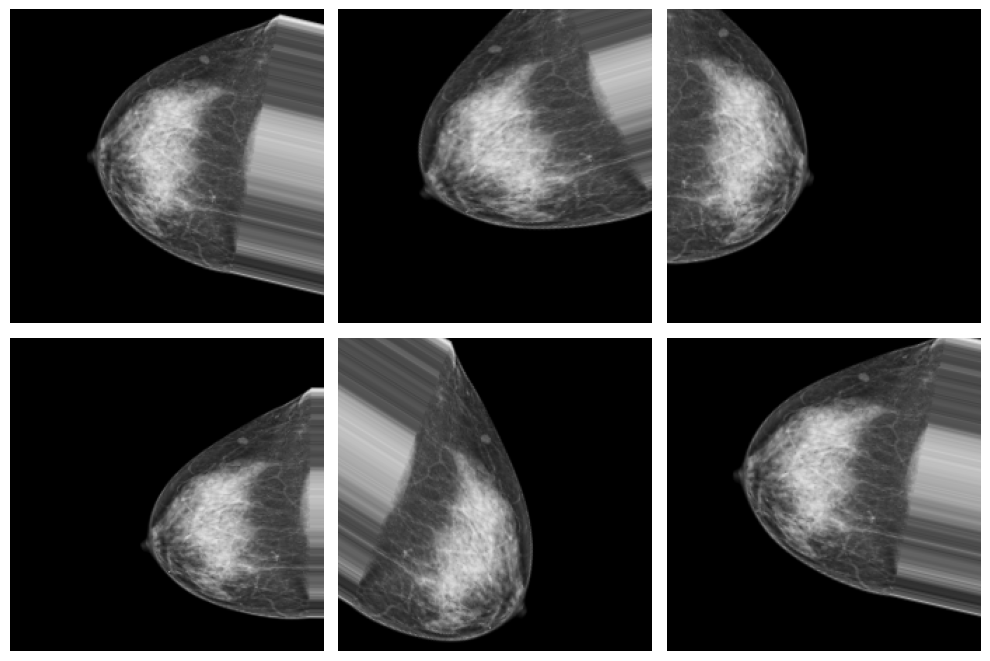

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,       # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.2,   # Shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # Shift images vertically (fraction of total height)
    shear_range=0.2,         # Shear intensity (shear angle in counter-clockwise direction as radians)
    zoom_range=0.2,          # Randomly zoom image
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill mode for points outside the input boundaries
)

# Fit the ImageDataGenerator on the training data
train_datagen.fit(x_train)

# Example of how to use the ImageDataGenerator
example_data = x_train[:1]  # Take one example image from the training data

# Generate augmented images and count them
num_augmented_images = 0
augmented_images = []
for x_batch in train_datagen.flow(example_data, batch_size=1):
    augmented_images.append(x_batch)
    num_augmented_images += 1
    if num_augmented_images >= 6:  # Generate 6 augmented images for example
        break

# Display the number of augmented images
print(f"Number of augmented images generated: {num_augmented_images}")

# Display the augmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, image in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.squeeze())  # Squeeze to remove single-dimensional entries from the shape of an array
    plt.axis('off')
plt.tight_layout()
plt.show()


## Step 6: Train the Model with Class Weights
Now, let's train the model using class weights to handle the class imbalance.

##Step 7 The model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 output classes (Normal, Benign, Malignant)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow import keras

# # Ensure y_train and y_test are one-hot encoded
# from tensorflow.keras.utils import to_categorical

# y_train_onehot = to_categorical(y_train, num_classes=3)
# y_test_onehot = to_categorical(y_test, num_classes=3)

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, #'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# history = model.fit(x_train, y_train_onehot, epochs=50, batch_size=32,
#                     validation_data=(x_test, y_test_onehot),
#                     callbacks=[early_stopping, model_checkpoint])

Define Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)

Step 6: Model Training

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint], class_weight=class_weights)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4306 - loss: 0.9208
Epoch 1: val_loss improved from inf to 1.06844, saving model to best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 864ms/step - accuracy: 0.4332 - loss: 0.9185 - val_accuracy: 0.5208 - val_loss: 1.0684
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5835 - loss: 0.7905
Epoch 2: val_loss improved from 1.06844 to 1.06466, saving model to best_model.keras
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.5800 - loss: 0.7919 - val_accuracy: 0.4271 - val_loss: 1.0647
Epoch 3/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5781 - loss: 0.7692
Epoch 3: val_loss did not improve from 1.06466
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5760 - loss: 0.7690 - val_accuracy: 0.4792 - val_loss: 1.1020
Epoch 4/50
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6156 - loss: 0.7334
Epoch 4: val_loss did not improve from 1.06466
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accura

## Step 7: Evaluate Model Performance

Evaluate on Test Data: After training, evaluate the model's performance on the test data to assess its accuracy, precision, recall, F1-score, and confusion matrix.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4049 - loss: 1.1272
Test Accuracy: 0.4270833432674408


Compute Metrics: Compute additional metrics like precision, recall, and F1-score using scikit-learn's classification_report and confusion_matrix.

In [ ]:
# @title
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Ensure y_test is not one-hot encoded for metric calculations
# If y_test is already in class label format, skip this step
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Predict probabilities for the test set
y_pred_probs = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes))

# Print confusion matrix
print(confusion_matrix(y_test_classes, y_pred_classes))

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


2/2 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        46
           2       0.40      0.57      0.47        14

    accuracy                           0.70        60
   macro avg       0.62      0.66      0.63        60
weighted avg       0.74      0.70      0.72        60

[[34 12]
 [ 6  8]]
Precision: 0.745
Recall: 0.7
F1 Score: 0.7160054719562243


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Ensure y_test is not one-hot encoded for metric calculations
# If y_test is already in class label format, skip this step
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test

# Predict probabilities for the test set
y_pred_probs = model.predict(x_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print unique classes in predictions and test labels to check for presence of all classes
print("Unique classes in y_test_classes:", np.unique(y_test_classes))
print("Unique classes in y_pred_classes:", np.unique(y_pred_classes))

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, labels=[0, 1, 2]))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes, labels=[0, 1, 2]))

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
Unique classes in y_test_classes: [0 1 2]
Unique classes in y_pred_classes: [0 1 2]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.42      0.22      0.29        36
           2       0.44      0.79      0.56        42

    accuracy                           0.43        96
   macro avg       0.29      0.34      0.29        96
weighted avg       0.35      0.43      0.36        96

Confusion Matrix:
[[ 0  4 14]
 [ 0  8 28]
 [ 2  7 33]]
Precision: 0.35039473684210526
Recall: 0.4270833333333333
F1 Score: 0.3558857808857809


## Result Interpretation

The performance metrics and confusion matrix indicate that the model is heavily biased towards predicting the class with the majority of samples (class 2, "Malignant"). This is a common issue when dealing with imbalanced datasets.

## Step 9: Save and Deploy the Model
Once satisfied with the model's performance, save the trained model for future use or deployment in applications.

In [ ]:
model.save('Cancer_BiradPrediction_model_01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Step 8: Fine-tuning and Optimization (Optional)
Depending on the performance metrics obtained in Step 7, we choose to fine-tune your model by adjusting hyperparameters, optimizing data augmentation strategies, or exploring different model architectures to improve performance.

Step 1: Compute Class Weights

In [ ]:
# @title
from sklearn.utils import class_weight
import numpy as np

# Assuming labels_mapped is the array of original mapped labels (not one-hot encoded)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels_mapped),
    y=labels_mapped
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


NameError: name 'labels_mapped' is not defined

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Assuming labels_mapped is the array of original mapped labels (not one-hot encoded)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: 1.7666666666666666, 1: 0.888268156424581, 2: 0.7644230769230769}


Step 2: Retrain the Model with Class Weights

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model with class weights
history = model.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 519ms/step - accuracy: 0.3094 - loss: 1.6683 - val_accuracy: 0.4062 - val_loss: 1.0877
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.4254 - loss: 1.0734 - val_accuracy: 0.3958 - val_loss: 1.0716
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.3774 - loss: 1.0890 - val_accuracy: 0.4271 - val_loss: 1.0860
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.4120 - loss: 1.0784 - val_accuracy: 0.3958 - val_loss: 1.1101
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.4327 - loss: 1.0807 - val_accuracy: 0.4062 - val_loss: 1.0707
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.4366 - loss: 1.0832 - val_accuracy: 0.4167 - val_loss: 1.0745
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.4011 - loss: 1.0802 - val_accuracy: 0.5000 - val_loss: 1.0630
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.4859 - loss: 1.0809 - val_accuracy: 0.4688 - v

Step 3: Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Generate predictions and calculate precision, recall, F1 score, and confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.55      0.67      0.60        36
           2       0.61      0.71      0.66        42

    accuracy                           0.56        96
   macro avg       0.39      0.46      0.42        96
weighted avg       0.47      0.56      0.51        96

[[ 0 11  7]
 [ 0 24 12]
 [ 3  9 30]]
Precision: 0.4724025974025974
Recall: 0.5625
F1 Score: 0.5134615384615384


Explanation of Each Step:

1. Compute Class Weights:

The class_weight.compute_class_weight function computes weights to balance the classes in the dataset. This helps the model pay more attention to the underrepresented classes.

2. Train the Model with Class Weights:

We then used the computed class weights in the model.fit function to train the model. This will help in addressing the class imbalance issue.

3. Evaluate the Model:

Then we used the model to predict the classes of the test data.
Calculate and print the precision, recall, f1-score, and confusion matrix to evaluate the model's performance.

adjusting the class weights has improved the performance for the class 1 but not sufficiently for class 0

## Fine-tune again

Step 1: Data Augmentation for the Underrepresented Class (Malignant)
We will generate augmented data to balance the number of samples in each class.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation for the underrepresented class (Malignant)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment data for a specific class
def augment_class_data(x_train, y_train, class_label, augment_size):
    class_data = x_train[np.argmax(y_train, axis=1) == class_label]
    augmented_data = []
    augmented_labels = []
    for _ in range(augment_size // len(class_data) + 1):
        for x_batch in datagen.flow(class_data, batch_size=1):
            augmented_data.append(x_batch[0])
            augmented_labels.append(to_categorical(class_label, num_classes=3))
            if len(augmented_data) >= augment_size:
                break
    return np.array(augmented_data), np.array(augmented_labels)

# Number of samples to generate
augment_size = 110  # 195 (Normal) - 85 (Malignant) = 110

# Augment data for the Malignant class
x_aug_malignant, y_aug_malignant = augment_class_data(x_train, y_train, class_label=2, augment_size=augment_size)

# Combine the augmented data with the original training data
x_train_aug = np.concatenate((x_train, x_aug_malignant), axis=0)
y_train_aug = np.concatenate((y_train, y_aug_malignant), axis=0)

# Shuffle the augmented training data
indices = np.arange(len(x_train_aug))
np.random.shuffle(indices)
x_train_aug = x_train_aug[indices]
y_train_aug = y_train_aug[indices]

# Display new shape of augmented data
print(f"x_train_aug shape: {x_train_aug.shape}")
print(f"y_train_aug shape: {y_train_aug.shape}")


x_train_aug shape: (491, 224, 224, 3)
y_train_aug shape: (491, 3)


Step 2: Adjust Class Weights

Adjust class weights to further address the imbalance.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train_aug, axis=1)),
    y=np.argmax(y_train_aug, axis=1)
)

class_weight_dict = dict(enumerate(class_weights))
print(f"Class Weights: {class_weight_dict}")

Class Weights: {0: 2.2731481481481484, 1: 1.1445221445221445, 2: 0.5929951690821256}


Step 3: Train the Model with Augmented Data and Class Weights

In [ ]:
# Note that our model has already been defined as 'model' above)

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    x_train_aug, y_train_aug, epochs=50, batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions and calculate precision, recall, F1 score, and confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 393ms/step - accuracy: 0.6050 - loss: 0.9700 - val_accuracy: 0.5208 - val_loss: 0.9665
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5589 - loss: 1.0023 - val_accuracy: 0.5000 - val_loss: 0.9968
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5886 - loss: 0.9971 - val_accuracy: 0.5208 - val_loss: 0.9840
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5926 - loss: 0.9297 - val_accuracy: 0.5000 - val_loss: 0.9812
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6096 - loss: 0.9472 - val_accuracy: 0.4688 - val_loss: 1.0052
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6758 - loss: 0.8600 - val_accuracy: 0.4792 - val_loss: 0.9873
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6955 - loss: 0.8146 - val_accuracy: 0.5000 - val_loss: 1.0337
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6870 - loss: 0.7543 - val_accuracy: 0.4583 - 

the model is still having difficulty classifying the "Normal" and "Benign" classes correctly.

Step 4: Further Data Augmentation and Retraining

We would try a different model architectures, such as using a pre-trained model (e.g., VGG16)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Use a pre-trained model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_vgg16.keras', monitor='val_loss', save_best_only=True)

# Train the model with the augmented data and class weights
history = model.fit(
    x_train_aug, y_train_aug, epochs=50, batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Generate predictions and calculate precision, recall, F1 score, and confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 966ms/step - accuracy: 0.4348 - loss: 1.4406 - val_accuracy: 0.5208 - val_loss: 1.0123
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.5919 - loss: 1.0470 - val_accuracy: 0.5833 - val_loss: 0.9527
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 327ms/step - accuracy: 0.6656 - loss: 0.8550 - val_accuracy: 0.5729 - val_loss: 0.9263
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 174ms/step - accuracy: 0.6220 - loss: 0.8342 - val_accuracy: 0.5938 - val_loss: 0.9620
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.7257 - loss: 0.7917 - val_accuracy: 0.5938 - val_loss: 0.9561
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.7303 - loss: 0.7650 - val_accuracy: 0.5208 - val_loss: 1.0358
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.7062 - loss: 0.6874 - val_accuracy: 0.5938 - val_loss: 0.9640
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.7742 - loss: 0.5777 - val_accuracy: 0

Learning Curves
Learning curves show how the performance of our model (typically loss and accuracy) changes over epochs for both training and validation datasets. This helps in understanding if the model is overfitting or underfitting.

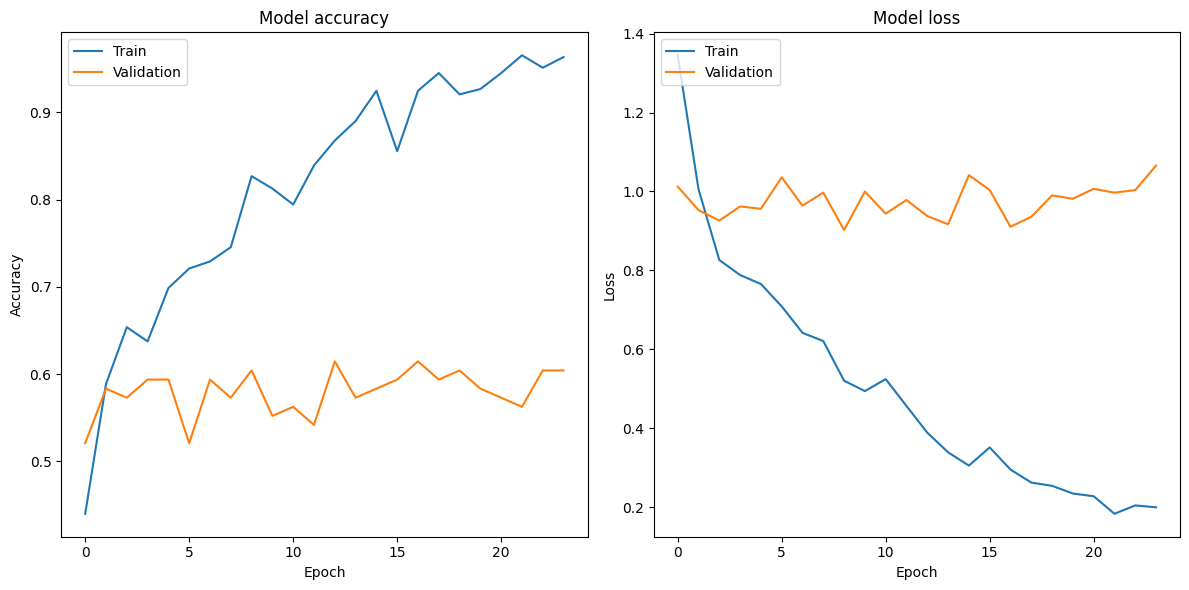

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming 'history' is the variable containing the history object from model.fit
plot_learning_curves(history)


Confusion Matrix

A confusion matrix provides a summary of the predictions made by a classifier. It shows the number of true positives, true negatives, false positives, and false negatives.

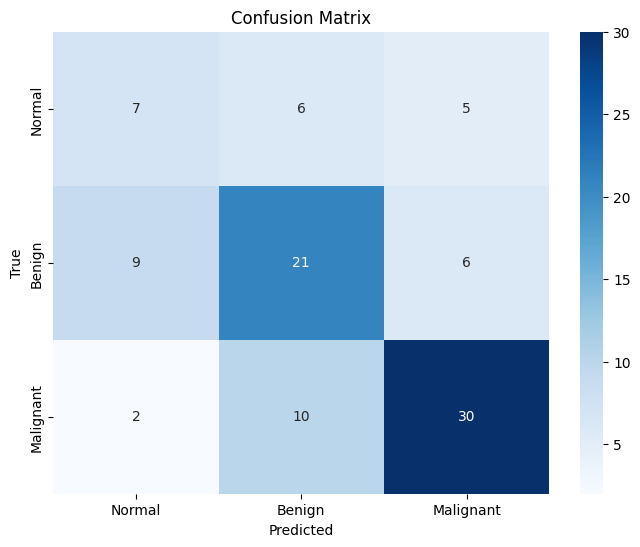

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming 'y_true' and 'y_pred' are the true and predicted labels respectively
# Assuming 'classes' is a list of class names or labels
plot_confusion_matrix(y_true, y_pred, classes=['Normal', 'Benign', 'Malignant'])


ROC Curve (Receiver Operating
Characteristic)

ROC curves are useful for evaluating the performance of a binary classifier across different thresholds. For multi-class classification, you can plot ROC curves for each class against the rest.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


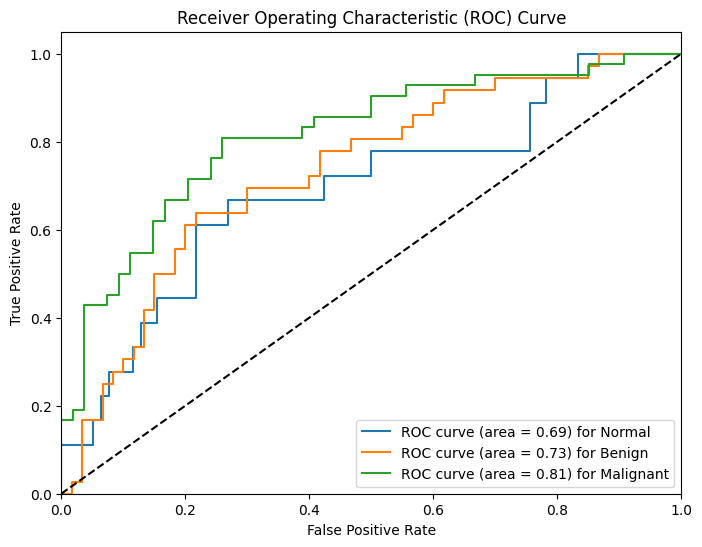

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {classes[i]}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming 'y_test' are the true labels and 'model' is your trained Keras model
# 'y_test' should be one-hot encoded
y_prob = model.predict(x_test)

# Convert y_test to one-hot encoding if not already
y_true = y_test

# List of class names or labels
classes = ['Normal', 'Benign', 'Malignant']

# Plot the ROC curve
plot_roc_curve(y_true, y_prob, classes)


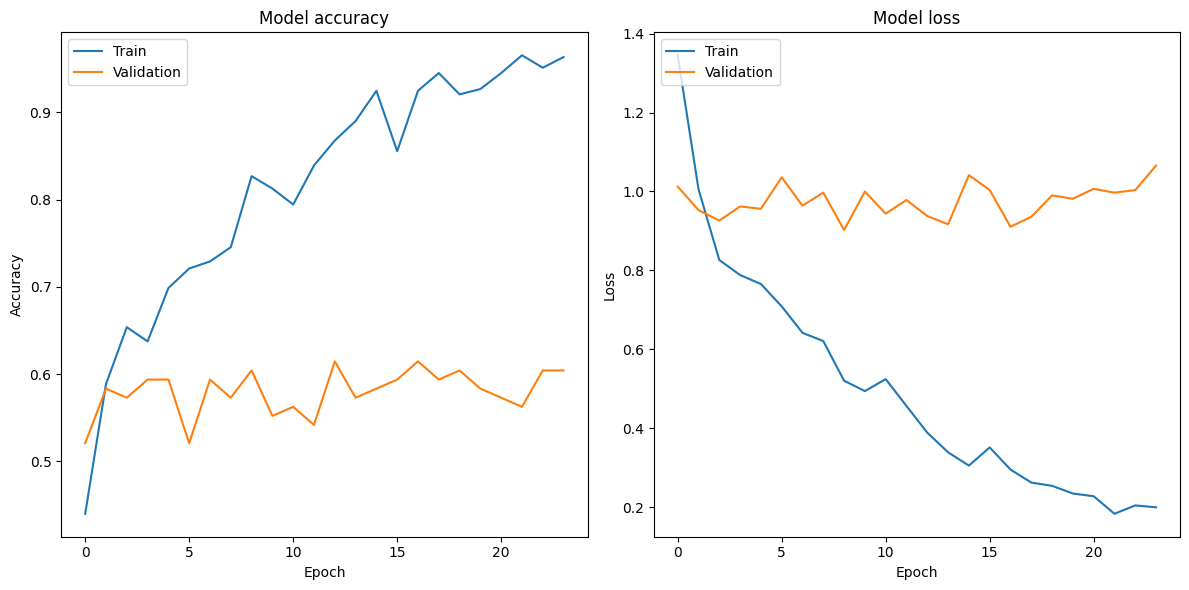

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


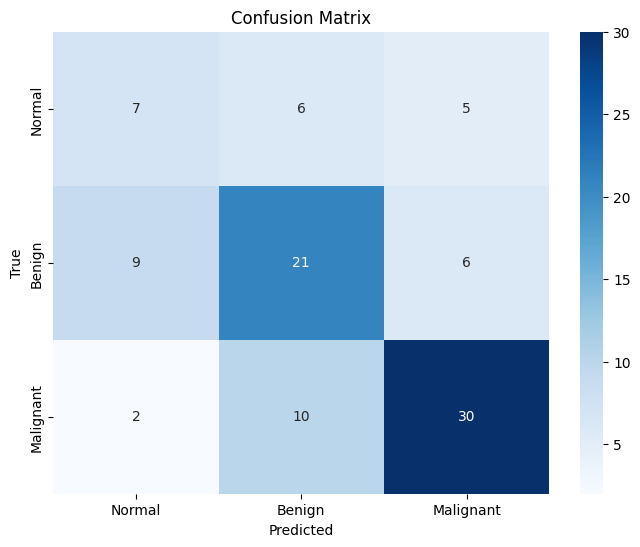

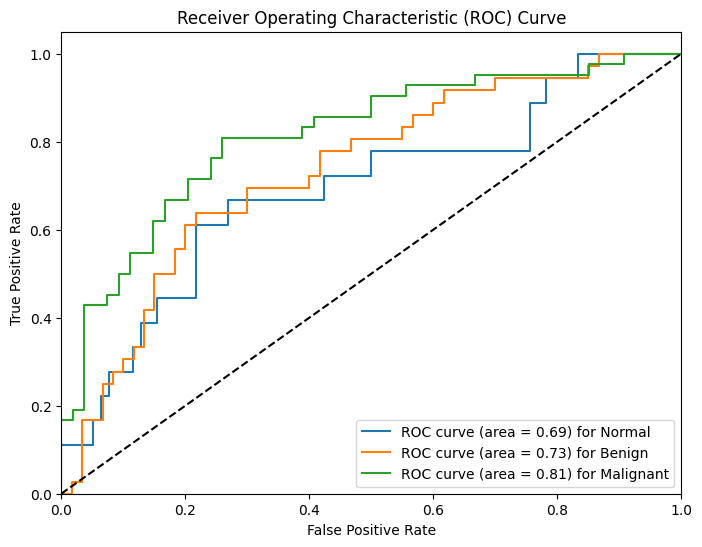

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# 1. Plot Learning Curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# 2. Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# 3. Plot ROC Curve
def plot_roc_curve(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {classes[i]}')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming 'history' is the variable containing the history object from model.fit
plot_learning_curves(history)

# Assuming 'y_test' are the true labels and 'model' is your trained Keras model
# 'y_test' should be one-hot encoded
y_prob = model.predict(x_test)

# Convert y_test to one-hot encoding if not already
y_true = y_test

# List of class names or labels
classes = ['Normal', 'Benign', 'Malignant']

# Get the predicted classes
y_pred_classes = np.argmax(y_prob, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Plot the confusion matrix
plot_confusion_matrix(y_true_classes, y_pred_classes, classes)

# Plot the ROC curve
plot_roc_curve(y_true, y_prob, classes)


## Step 9: Save and Deploy the Model
Once satisfied with the model's performance, save the trained model for future use or deployment in

In [ ]:
# save the model?

model.save('my_model_vgg16.h5')
model.save('my_model_vgg16.keras')

In [ ]:
# Streamlit code for reading mammograms into this model and display image class

!pip install streamlit

import streamlit as st
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('my_model_vgg16.h5')  # Replace with your model filename

# Define class labels
class_labels = ['Normal', 'Benign', 'Malignant']

# Define image preprocessing function
def preprocess_image(image):
  IMG_SIZE = 224  # Replace with the image size used during training
  img = image.resize((IMG_SIZE, IMG_SIZE))
  img_array = np.array(img)
  img_array = img_array / 255.0  # Normalize pixel values
  img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
  return img_array

# Streamlit app
st.title("Mammogram Classification")

uploaded_file = st.file_uploader("Choose a mammogram image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  image = Image.open(uploaded_file)
  st.image(image, caption='Uploaded Image', use_column_width=True)

  # Preprocess the image
  preprocessed_image = preprocess_image(image)

  # Make prediction
  prediction = model.predict(preprocessed_image)
  predicted_class = class_labels[np.argmax(prediction)]

  st.write(f"Predicted Class: **{predicted_class}**")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


2024-08-04 14:19:36.963 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
